In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
import pandas as pd

# Load the dataset (adjust the file path as needed)
file_path = "/content/cat_nat.csv"
df = pd.read_csv(file_path)

# Rename the first column from "year_of_sinistre" to "Year"
df.rename(columns={"year_of_sinistre": "Year"}, inplace=True)

# Melt the DataFrame from wide to long format
df_long = df.melt(id_vars=["Year"], var_name="Development Year", value_name="Claim Amount")

# Extract numeric value from "Development Year" (e.g., "Dev_Year_0" becomes 0)
df_long["Development Year"] = df_long["Development Year"].str.extract(r'(\d+)$').astype(int)

# Sort the long DataFrame by Year and Development Year for clarity
df_long = df_long.sort_values(["Year", "Development Year"]).reset_index(drop=True)

df2=df_long

In [124]:
df2

,Year,Development Year,Claim Amount
0,2012,0,0.00
1,2012,1,0.00
2,2012,2,10200.00
3,2012,3,7780.00
4,2012,4,7502194.83
5,2013,0,0.00
6,2013,1,35786.44
7,2013,2,0.00
8,2013,3,0.00
9,2013,4,NaN


In [125]:
na_data = df2[df2['Claim Amount'].isna()]

# Remove rows with NaN values from df2
df2 = df2.dropna(subset=['Claim Amount'])

In [126]:
df2.isnull().sum()

,0
Year,0
Development Year,0
Claim Amount,0


In [130]:
# Generate Pareto-distributed random variables
mean = 188250741.9
alpha = 1.05
xm = mean * ((alpha - 1) / alpha)  # Scale parameter (minimum claim value)
 # Shape parameter
num_missing = 8  # Number of NaNs to replace

# Generate only as many samples as there are NaNs
simulated_claims = xm * (1 + np.random.pareto(alpha, num_missing))

In [131]:
simulated_claims

array([2.00376829e+07, 4.57708121e+07, 4.70691677e+07, 1.17548088e+07,
       1.90335356e+07, 2.88889664e+07, 1.14097389e+08, 8.99219887e+06])

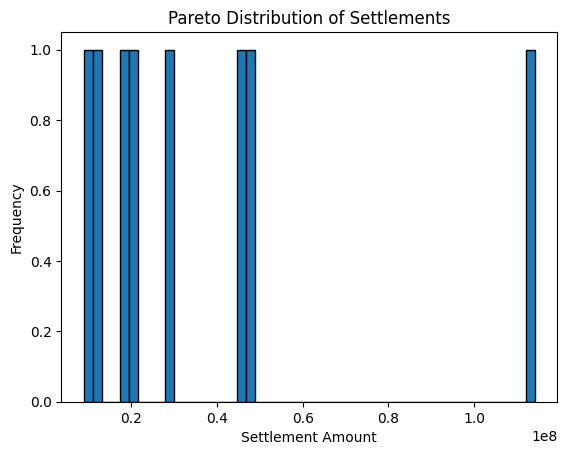

In [132]:
plt.hist(simulated_claims, bins=50, edgecolor='black')
plt.title('Pareto Distribution of Settlements')
plt.xlabel('Settlement Amount')
plt.ylabel('Frequency')
plt.show()

In [127]:
# Replace 0s with NaN
df2['Claim Amount'] = df2['Claim Amount'].replace(0, np.nan)

# Now df['Claim Amount'] contains NaN where there were previously 0s
print(df2['Claim Amount'].value_counts())


Claim Amount
10200.00      1
7780.00       1
7502194.83    1
35786.44      1
27137.13      1
18118.99      1
8611.38       1
2464.90       1
14976.22      1
2441.20       1
12455.71      1
156220.63     1
Name: count, dtype: int64


<ipython-input-127-af8ef42353e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Claim Amount'] = df2['Claim Amount'].replace(0, np.nan)


In [128]:
df2

,Year,Development Year,Claim Amount
0,2012,0,NaN
1,2012,1,NaN
2,2012,2,10200.00
3,2012,3,7780.00
4,2012,4,7502194.83
5,2013,0,NaN
6,2013,1,35786.44
7,2013,2,NaN
8,2013,3,NaN
10,2014,0,27137.13


In [129]:
df2.isnull().sum()

,0
Year,0
Development Year,0
Claim Amount,8


In [133]:
df2.loc[df2["Claim Amount"].isna(), "Claim Amount"] = np.random.choice(simulated_claims, num_missing, replace=False)

In [134]:
df2

,Year,Development Year,Claim Amount
0,2012,0,4.577081e+07
1,2012,1,1.140974e+08
2,2012,2,1.020000e+04
3,2012,3,7.780000e+03
4,2012,4,7.502195e+06
5,2013,0,8.992199e+06
6,2013,1,3.578644e+04
7,2013,2,1.175481e+07
8,2013,3,2.888897e+07
10,2014,0,2.713713e+04


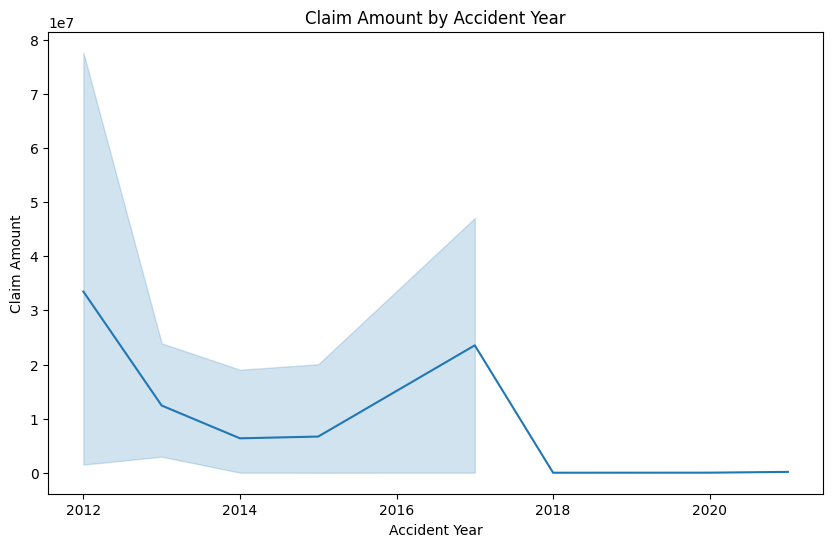

In [135]:
# prompt: plot lineplot of Claim Amount by year

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Claim Amount', data=df2)
plt.title('Claim Amount by Accident Year')
plt.xlabel('Accident Year')
plt.ylabel('Claim Amount')
plt.show()

In [136]:
df2.to_csv("catnattrain.csv", index=False)

In [137]:
na_data.to_csv("catnattest.csv")